In [11]:
#'https://www.pro-football-reference.com'
    
class RequestESPNData:
    def __init__(self):
        self.year = 2019
        try:
            with open("D:/Github/espn_cookies.json") as file:
                data = file.read()
                data_json = json.loads(data)
        except:
            data_json = {
                "espn_s2": "",
                "SWID": "",
                "league_id": ""
            }
        self.league_id = data_json["league_id"]
        self.swid = data_json["SWID"]
        self.espn_s2 = data_json["espn_s2"]
        self.cookies = {
            "espn_s2": self.espn_s2,
            "SWID": self.swid
        }
        self.session = requests.Session()

    def current_year(self, year):
        current_url = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}".format(year, self.league_id)
        return current_url

    def historical_year(self, year):
        historical_url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/{}?seasonId={}".format(self.league_id, year)
        return historical_url

In [62]:
x = RequestESPNData()
url = x.historical_year(2018)
curl = x.current_year(2019)

In [66]:
r = x.session.get(url, cookies=x.cookies)
data = r.json()
data

[{'gameId': 1,
  'id': 577577,
  'members': [{'displayName': 'Bkong1017',
    'id': '{21B1FE07-1DBC-42BF-9647-C8C1C4F1D36B}',
    'isLeagueManager': False},
   {'displayName': 'zmt6054yahoo.com',
    'id': '{5F906F45-4A98-4A98-B958-C7610761AC42}',
    'isLeagueManager': False},
   {'displayName': 'murphyballer23',
    'id': '{749D065F-FEFA-4320-B744-5B5C79FC448F}',
    'isLeagueManager': False},
   {'displayName': 'macballer703',
    'id': '{7FEF1398-D0D9-45D6-B409-62C67F3BD57C}',
    'isLeagueManager': False},
   {'displayName': 'vgupsta',
    'id': '{B2D2AFF1-B948-4081-92AF-F1B948508156}',
    'isLeagueManager': False},
   {'displayName': 'htbiggs',
    'id': '{C4FCE962-F78B-41F6-88F0-7D686D3DF7B1}',
    'isLeagueManager': False},
   {'displayName': 'djslocum13',
    'id': '{CF0251D0-5ADB-4F18-AF30-FE7E257B8C7F}',
    'isLeagueManager': False},
   {'displayName': 'terpsman8',
    'id': '{F9BF43A3-6003-4FAE-9A12-A8C8B8676959}',
    'isLeagueManager': False}],
  'scoringPeriodId': 16,


In [44]:
for i in data[0]:
    print(i)
    try:
        for k in data[0][i]:
            print('-', k)
    except:
        continue

segmentId
status
- latestScoringPeriod
- isActive
- currentMatchupPeriod
members
- {'displayName': 'Bkong1017', 'id': '{21B1FE07-1DBC-42BF-9647-C8C1C4F1D36B}', 'isLeagueManager': False}
- {'displayName': 'zmt6054yahoo.com', 'id': '{5F906F45-4A98-4A98-B958-C7610761AC42}', 'isLeagueManager': False}
- {'displayName': 'murphyballer23', 'id': '{749D065F-FEFA-4320-B744-5B5C79FC448F}', 'isLeagueManager': False}
- {'displayName': 'macballer703', 'id': '{7FEF1398-D0D9-45D6-B409-62C67F3BD57C}', 'isLeagueManager': False}
- {'displayName': 'vgupsta', 'id': '{B2D2AFF1-B948-4081-92AF-F1B948508156}', 'isLeagueManager': False}
- {'displayName': 'htbiggs', 'id': '{C4FCE962-F78B-41F6-88F0-7D686D3DF7B1}', 'isLeagueManager': False}
- {'displayName': 'djslocum13', 'id': '{CF0251D0-5ADB-4F18-AF30-FE7E257B8C7F}', 'isLeagueManager': False}
- {'displayName': 'terpsman8', 'id': '{F9BF43A3-6003-4FAE-9A12-A8C8B8676959}', 'isLeagueManager': False}
settings
- name
scoringPeriodId
gameId
teams
- {'location': 'My Tea

In [67]:
params = {
    "view": "mMatchup"
}
r = x.session.get(url, cookies=x.cookies, params=params)
data = r.json()

In [68]:
for i in data[0]:
    print(i)
    try:
        for k in data[0][i]:
            print('-', k)
    except:
        continue

segmentId
schedule
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 4, 'pointsByScoringPeriod': {'1': 121.5}, 'totalPoints': 121.5}, 'home': {'gamesPlayed': 0, 'teamId': 3, 'pointsByScoringPeriod': {'1': 101.0}, 'totalPoints': 101.0}, 'id': 0, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 2, 'pointsByScoringPeriod': {'1': 132.5}, 'totalPoints': 132.5}, 'home': {'gamesPlayed': 0, 'teamId': 9, 'pointsByScoringPeriod': {'1': 103.0}, 'totalPoints': 103.0}, 'id': 1, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 1, 'pointsByScoringPeriod': {'1': 112.0}, 'totalPoints': 112.0}, 'home': {'gamesPlayed': 0, 'teamId': 8, 'pointsByScoringPeriod': {'1': 100.0}, 'totalPoints': 100.0}, 'id': 2, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 7, 'pointsByScoringPeriod': {'1': 134.5}, 'totalPoints': 134.5}, 'home': {'gamesPlayed': 0, 'teamId': 5, 'pointsByScoringPeriod': {'1': 105.0}, 'totalPoint

In [37]:
data[0]['draftDetail']

{'drafted': True, 'inProgress': False}

In [41]:
df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in data[0]['schedule']]
df = pd.DataFrame(df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
df.sample(20)

Week  Team1  Score1  Team2  Score2     Type
16     5      5    94.0      4    80.5  Regular
45    12      8   124.5      7   134.5  Regular
44    12      4    87.0      5    86.0  Regular
5      2      1   146.5      3   105.0  Regular
33     9      3   106.5      1   133.5  Regular
41    11      1   142.5      5    62.5  Regular
17     5      7   102.0      8   149.0  Regular
36    10      4   125.5      1   167.0  Regular
27     7      7   102.5      1   172.5  Regular
15     4      9   108.0      3   126.5  Regular
51    13      5   157.5      7   253.0  Regular
18     5      1   122.5      9   123.0  Regular
54    14      8   179.0      7   180.0  Regular
20     6      4    93.0      8   114.0  Regular
21     6      9   145.5      5    69.0  Regular
37    10      7   124.0      2   119.5  Regular
19     5      2   157.5      3    84.5  Regular
12     4      4   166.5      7   102.5  Regular
38    10      5    89.0      3   121.5  Regular
31     8      7   107.5      5   109.5  Regular

In [46]:
df3 = df.assign(Margin1 = df['Score1'] - df['Score2'],
                Margin2 = df['Score2'] - df['Score1'])
df3 = (df3[['Week', 'Team1', 'Margin1', 'Type']]
 .rename(columns={'Team1': 'Team', 'Margin1': 'Margin'})
 .append(df3[['Week', 'Team2', 'Margin2', 'Type']]
 .rename(columns={'Team2': 'Team', 'Margin2': 'Margin'}))
)
df3.head()

Week  Team  Margin     Type
0     1     3   -20.5  Regular
1     1     9   -29.5  Regular
2     1     8   -12.0  Regular
3     1     5   -29.5  Regular
4     2     4   -18.0  Regular

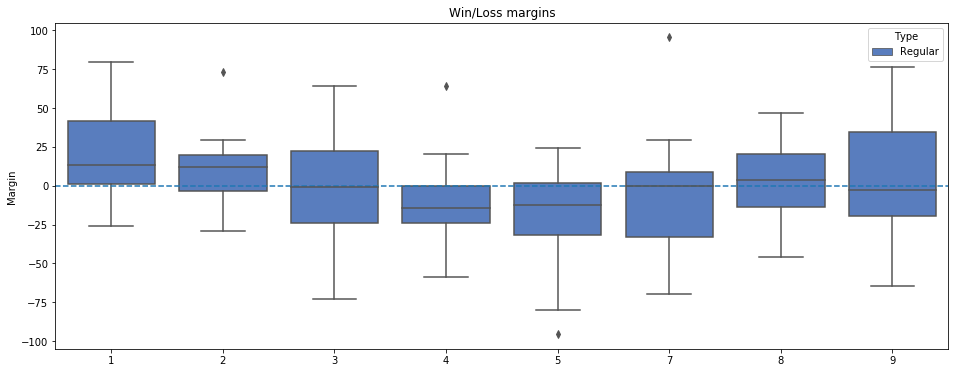

In [53]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
df3 = df3.sort_values(['Week'])
sns.boxplot(x='Team', y='Margin', hue='Type',
            data=df3,
            palette='muted')
ax.axhline(0, ls='--')
ax.set_xlabel('')
ax.set_title('Win/Loss margins')
plt.show()

In [54]:
df3.Week.value_counts()

14    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
2     8
1     8
Name: Week, dtype: int64

In [71]:
vars = ['mMatchup','mTeam','mBoxscore','mRoster','mSettings','kona_player_info','player_wl','mSchedule', 'mNav']
for var in vars:
    params = {
        "view": "{}".format(var),
        'matchupPeriodId': 5,
    }
    r = x.session.get(url, cookies=r.cookies, params=params)
    data = r.json()
    print("#" * 40)
    print(var.upper())
    print("-" * 40)
    for i in data[0]:
        print(i)
        try:
            for k in data[0][i]:
                print('-', k)
        except:
            continue
    print("#"* 40)

########################################
MMATCHUP
----------------------------------------
segmentId
schedule
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 4, 'pointsByScoringPeriod': {'1': 121.5}, 'totalPoints': 121.5}, 'home': {'gamesPlayed': 0, 'teamId': 3, 'pointsByScoringPeriod': {'1': 101.0}, 'totalPoints': 101.0}, 'id': 0, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 2, 'pointsByScoringPeriod': {'1': 132.5}, 'totalPoints': 132.5}, 'home': {'gamesPlayed': 0, 'teamId': 9, 'pointsByScoringPeriod': {'1': 103.0}, 'totalPoints': 103.0}, 'id': 1, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 1, 'pointsByScoringPeriod': {'1': 112.0}, 'totalPoints': 112.0}, 'home': {'gamesPlayed': 0, 'teamId': 8, 'pointsByScoringPeriod': {'1': 100.0}, 'totalPoints': 100.0}, 'id': 2, 'matchupPeriodId': 1}
- {'winner': 'AWAY', 'away': {'gamesPlayed': 0, 'teamId': 7, 'pointsByScoringPeriod': {'1': 134.5}, 'totalPoints': 134.5},

- {'displayName': 'djslocum13', 'id': '{CF0251D0-5ADB-4F18-AF30-FE7E257B8C7F}', 'firstName': 'Danny', 'lastName': 'Slocum'}
- {'displayName': 'terpsman8', 'id': '{F9BF43A3-6003-4FAE-9A12-A8C8B8676959}', 'firstName': 'Nathan', 'lastName': 'Weiner'}
scoringPeriodId
teams
- {'rankCalculatedFinal': 1, 'logoType': 'CUSTOM', 'currentProjectedRank': 0, 'logo': 'https://i.imgur.com/xKZ59vl.png', 'owners': ['{5F906F45-4A98-4A98-B958-C7610761AC42}'], 'draftDayProjectedRank': 0, 'playoffSeed': 2, 'rankFinal': 0, 'isActive': False, 'divisionId': 0, 'location': 'My Team is', 'points': 2106.5, 'id': 1, 'abbrev': 'Town', 'record': {'division': {'gamesBack': 0.0, 'percentage': 0.6666666666666666, 'pointsAgainst': 0.0, 'streakType': 'NONE', 'losses': 4, 'ties': 0, 'wins': 8, 'streakLength': 0, 'pointsFor': 0.0}, 'away': {'gamesBack': 0.0, 'percentage': 0.0, 'pointsAgainst': 0.0, 'streakType': 'NONE', 'losses': 3, 'ties': 0, 'wins': 4, 'streakLength': 0, 'pointsFor': 0.0}, 'home': {'gamesBack': 0.0, 'pe

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [65]:
r = x.session.get(curl, cookies=x.cookies)
data = r.json()
data

{'gameId': 1,
 'id': 577577,
 'members': [{'displayName': 'Bkong1017',
   'id': '{21B1FE07-1DBC-42BF-9647-C8C1C4F1D36B}',
   'isLeagueManager': False},
  {'displayName': 'zmt6054yahoo.com',
   'id': '{5F906F45-4A98-4A98-B958-C7610761AC42}',
   'isLeagueManager': False},
  {'displayName': 'murphyballer23',
   'id': '{749D065F-FEFA-4320-B744-5B5C79FC448F}',
   'isLeagueManager': False},
  {'displayName': 'macballer703',
   'id': '{7FEF1398-D0D9-45D6-B409-62C67F3BD57C}',
   'isLeagueManager': False},
  {'displayName': 'vgupsta',
   'id': '{B2D2AFF1-B948-4081-92AF-F1B948508156}',
   'isLeagueManager': False},
  {'displayName': 'htbiggs',
   'id': '{C4FCE962-F78B-41F6-88F0-7D686D3DF7B1}',
   'isLeagueManager': False},
  {'displayName': 'djslocum13',
   'id': '{CF0251D0-5ADB-4F18-AF30-FE7E257B8C7F}',
   'isLeagueManager': False},
  {'displayName': 'terpsman8',
   'id': '{F9BF43A3-6003-4FAE-9A12-A8C8B8676959}',
   'isLeagueManager': False}],
 'scoringPeriodId': 1,
 'seasonId': 2019,
 'segment

In [77]:
league_id = x.league_id
season=2018
swid = x.swid
espn=x.espn_s2

slotcodes = {
    0 : 'QB', 2 : 'RB', 4 : 'WR', 3 : 'RB',
    6 : 'TE', 16: 'Def', 17: 'K',
    20: 'Bench', 21: 'IR', 23: 'Flex', 'D/ST': 17
}

url = 'https://fantasy.espn.com/apis/v3/games/ffl/seasons/' + \
      str(season) + '/segments/0/leagues/' + str(league_id) + \
      '?view=mMatchup&view=mMatchupScore'

data = []
print('Week ', end='')
for week in range(1, 17):
    print(week, end=' ')

    r = requests.get(url,
                     params={'scoringPeriodId': week},
                     cookies={"SWID": swid, "espn_s2": espn})
    d = r.json()
    
    for tm in d['teams']:
        tmid = tm['id']
        for p in tm['roster']['entries']:
            name = p['playerPoolEntry']['player']['fullName']
            slot = p['lineupSlotId']
            pos  = slotcodes[slot]

            # injured status (need try/exc bc of D/ST)
            inj = 'NA'
            try:
                inj = p['playerPoolEntry']['player']['injuryStatus']
            except:
                pass

            # projected/actual points
            proj, act = None, None
            for stat in p['playerPoolEntry']['player']['stats']:
                if stat['scoringPeriodId'] != week:
                    continue
                if stat['statSourceId'] == 0:
                    act = stat['appliedTotal']
                elif stat['statSourceId'] == 1:
                    proj = stat['appliedTotal']

            data.append([
                week, tmid, name, slot, pos, inj, proj, act
            ])
print('\nComplete.')

data = pd.DataFrame(data, 
                    columns=['Week', 'Team', 'Player', 'Slot', 
                             'Pos', 'Status', 'Proj', 'Actual'])

Week 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
Complete.


In [79]:
data[data.Slot == 3]

Week  Team               Player  Slot Pos          Status       Proj  \
6        1     1         Alex Collins     3  RB  INJURY_RESERVE  11.356953   
21       1     2        Derrick Henry     3  RB          ACTIVE  10.829702   
35       1     3            Joe Mixon     3  RB          ACTIVE  10.999438   
55       1     4       Allen Robinson     3  RB          ACTIVE  12.243130   
69       1     5          Golden Tate     3  RB          ACTIVE   9.355228   
83       1     7          Tyreek Hill     3  RB          ACTIVE  10.642426   
102      1     8         Lamar Miller     3  RB          ACTIVE   9.132308   
115      1     9        Royce Freeman     3  RB          ACTIVE  10.832628   
134      2     1         Alex Collins     3  RB  INJURY_RESERVE  10.142721   
152      2     2  JuJu Smith-Schuster     3  RB          ACTIVE  11.060261   
167      2     3      Adrian Peterson     3  RB          ACTIVE  11.150681   
183      2     4       Allen Robinson     3  RB          ACTIVE  11.129682   
197      2     5          Golden Tate     3  RB          ACTIVE  10.389423   
211      2     7          Tyreek Hill     3  RB          ACTIVE  11.913568   
233      2     8        Tevin Coleman     3  RB          ACTIVE  13.893533   
245      2     9            Jay Ajayi     3  RB  INJURY_RESERVE  10.089650   
262      3     1         Alex Collins     3  RB  INJURY_RESERVE  10.646385   
280      3     2  JuJu Smith-Schuster     3  RB          ACTIVE  11.063142   
303      3     3         Chris Godwin     3  RB          ACTIVE   7.616835   
316      3     4        Will Fuller V     3  RB  INJURY_RESERVE   9.666005   
324      3     5          Golden Tate     3  RB          ACTIVE  10.531995   
339      3     7          Tyreek Hill     3  RB          ACTIVE  12.967468   
358      3     8         Lamar Miller     3  RB          ACTIVE  12.829827   
380      3     9        Corey Clement     3  RB  INJURY_RESERVE  10.164337   
390      4     1         Alex Collins     3  RB  INJURY_RESERVE  10.659039   
407      4     2  JuJu Smith-Schuster     3  RB          ACTIVE  12.161727   
431      4     3     Sterling Shepard     3  RB          ACTIVE  10.144273   
443      4     4        Will Fuller V     3  RB  INJURY_RESERVE  10.810777   
452      4     5          Golden Tate     3  RB          ACTIVE  11.123962   
467      4     7          Tyreek Hill     3  RB          ACTIVE  11.269474   
...    ...   ...                  ...   ...  ..             ...        ...   
1579    13     3            Joe Mixon     3  RB          ACTIVE  14.541441   
1598    13     4         Robert Woods     3  RB          ACTIVE  12.850889   
1618    13     5       Isaiah Crowell     3  RB  INJURY_RESERVE   8.065773   
1627    13     7          Tyreek Hill     3  RB          ACTIVE  16.024879   
1645    13     8       Julian Edelman     3  RB          ACTIVE  10.931514   
1669    13     9          Tarik Cohen     3  RB          ACTIVE   9.356092   
1683    14     1         Spencer Ware     3  RB          ACTIVE  12.464164   
1692    14     2  JuJu Smith-Schuster     3  RB          ACTIVE  14.359692   
1708    14     3            Joe Mixon     3  RB          ACTIVE  10.715108   
1727    14     4         Robert Woods     3  RB          ACTIVE  12.497557   
1752    14     5         Chris Godwin     3  RB          ACTIVE  11.102985   
1756    14     7          Tyreek Hill     3  RB          ACTIVE  14.728849   
1771    14     8         LeSean McCoy     3  RB          ACTIVE  11.273350   
1789    14     9        Austin Ekeler     3  RB          ACTIVE  16.075759   
1815    15     1      Jeff Wilson Jr.     3  RB    QUESTIONABLE   8.004990   
1821    15     2  JuJu Smith-Schuster     3  RB          ACTIVE  14.775164   
1837    15     3            Joe Mixon     3  RB          ACTIVE  14.817937   
1856    15     4         Robert Woods     3  RB          ACTIVE  13.041978   
1880    15     5         Chris Godwin     3  RB          ACTIVE   9.086372   
1885    15     7          Ty